## 欠損値の処理

In [3]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [4]:
%autoreload

In [5]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2022.csv'), index_col=0,  sep="\t")

In [6]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [7]:
df.isnull().sum()

race_id                        0
horse_id                       0
jockey_id                      0
trainer_id                     0
owner_id                       0
rank                           0
frame                          0
number                         0
sex                            0
age                            0
impost                         0
win_odds                       0
popularity                     0
weight                         0
weight_diff                    0
date                           0
race_type                      0
around                      1665
course_len                   349
weather                      335
ground_state                 335
race_class                  7389
place                       2381
reference_date              4713
rank_mean                   4713
rank_min                    4713
rank_max                    4713
rank_std                    9015
n_horses_mean               4713
rank_diff_mean              4717
rank_diff_

In [8]:
df

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,course_len_mode,same_course_len_avg_rank,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5
0,202201010101,2020100678,666,1066,356803,1.0,1,1,0,2,...,1800.0,4.000000,27.0,1.0,467.0,3327.0,174.0,442.0,780.0,3556.0
1,202201010101,2020105743,1091,420,639009,4.0,2,2,0,2,...,1200.0,4.428571,14.0,1.0,216.0,1412.0,195.0,390.0,869.0,4520.0
2,202201010101,2020102526,1170,1005,270006,2.0,3,3,0,2,...,1800.0,4.300000,6.0,0.0,386.0,6962.0,189.0,398.0,515.0,1558.0
3,202201010101,2020102360,1144,431,970006,5.0,4,4,0,2,...,1200.0,5.066667,21.0,1.0,475.0,7902.0,156.0,422.0,667.0,2505.0
4,202201010101,2020102535,1140,1005,270006,3.0,5,5,0,2,...,1800.0,3.250000,13.0,1.0,507.0,8947.0,189.0,457.0,144.0,1241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46835,202210040812,2018103127,1138,1142,184033,11.0,6,11,0,4,...,2000.0,4.000000,43.0,2.0,286.0,3535.0,176.0,421.0,645.0,6194.0
46836,202210040812,2018105295,1141,1137,708800,10.0,7,12,0,4,...,2000.0,6.958333,147.0,3.0,257.0,7660.0,67.0,438.0,764.0,6208.0
46837,202210040812,2019105032,1163,1075,906033,14.0,7,13,0,3,...,2200.0,4.107143,119.0,3.0,498.0,528.0,156.0,462.0,652.0,4239.0
46838,202210040812,2019100579,1193,1149,506800,4.0,8,14,0,3,...,2000.0,6.421053,7.0,0.0,385.0,5723.0,189.0,412.0,212.0,144.0


In [9]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [10]:
df_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2023.csv'), index_col=0,  sep="\t")
df_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [11]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

## RFmodel

In [10]:
%autoreload

In [11]:
rf = predict.RFModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = rf.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6787  501]
 [1568  478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      7288
           1       0.49      0.23      0.32      2046

    accuracy                           0.78      9334
   macro avg       0.65      0.58      0.59      9334
weighted avg       0.74      0.78      0.75      9334

Accuracy: 0.7783372616241697
Feature Importance:
                      feature  importance
10                   weather    0.053732
8                     around    0.045028
34  same_course_len_avg_rank    0.040488
14                 rank_mean    0.037403
11              ground_state    0.034625
24                 prize_sum    0.034530
23                prize_mean    0.031786
36    race_interval_category    0.031031
13                     place    0.030901
16                  rank_max    0.030517
44          horse_id_encoded    0.026075
43              date_encoded    0.025701
46        trainer_id

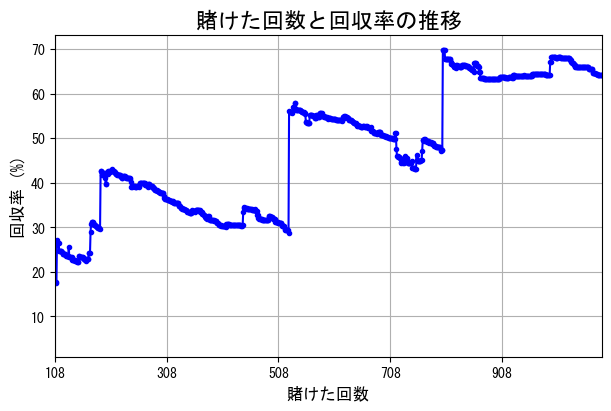

総払い戻し金額: 1439240.0円
賭けた回数: 1086回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,1040.0,5600,5600,1040.0,0.185714
1,202301010106,0.0,400,6000,1040.0,0.173333
2,202301010205,0.0,100,6100,1040.0,0.170492
3,202301010301,0.0,100,6200,1040.0,0.167742
4,202301010305,0.0,3500,9700,1040.0,0.107216
...,...,...,...,...,...,...
1081,202310030702,2290.0,2000,2235000,1436380.0,0.642676
1082,202310030704,0.0,100,2235100,1436380.0,0.642647
1083,202310030706,0.0,100,2235200,1436380.0,0.642618
1084,202310030805,2860.0,8400,2243600,1439240.0,0.641487


In [12]:
rf.plot_returns_rate(df_23)

## NNmodel

In [13]:
%autoreload

In [14]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = nn.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[5111 2177]
 [ 885 1161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77      7288
           1       0.35      0.57      0.43      2046

    accuracy                           0.67      9334
   macro avg       0.60      0.63      0.60      9334
weighted avg       0.74      0.67      0.70      9334

Accuracy: 0.6719520034283265
predicted_target
0    29730
1    17401
Name: count, dtype: int64
            race_id    horse_id  jockey_id  trainer_id  owner_id  rank  frame  \
0      202301010101  2021100648       1095        1128    281008   5.0      1   
1      202301010101  2021100159       1157        1186    170800   6.0      2   
2      202301010101  2021100265       1197        1192    320803   7.0      3   
3      202301010101  2021105553       5339        1160    680031   4.0      4   
4      202301010101  2021106854       1093        1091    464030   3.0      6   
...             ...    

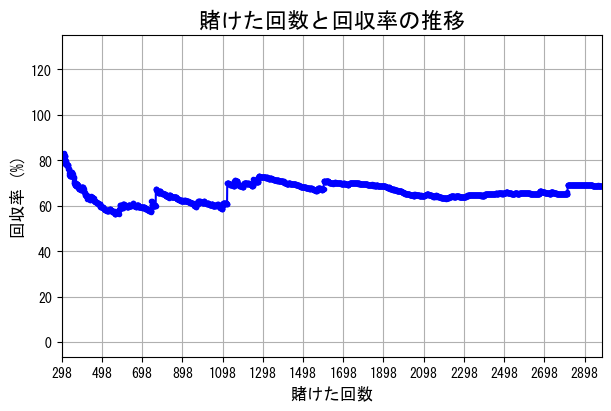

総払い戻し金額: 5363420.0円
賭けた回数: 2983回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010101,0.0,100,100,0.0,0.000000
1,202301010102,0.0,400,500,0.0,0.000000
2,202301010103,1930.0,1000,1500,1930.0,1.286667
3,202301010104,0.0,2000,3500,1930.0,0.551429
4,202301010105,1040.0,3500,7000,2970.0,0.424286
...,...,...,...,...,...,...
2978,202310030808,0.0,400,7804500,5360420.0,0.686837
2979,202310030809,0.0,1000,7805500,5360420.0,0.686749
2980,202310030810,0.0,400,7805900,5360420.0,0.686714
2981,202310030811,3000.0,3500,7809400,5363420.0,0.686790


In [15]:
nn.plot_returns_rate(df_23)

## LGBmodel

In [16]:
%autoreload

In [17]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='umatan', threshold=0.5, stochastic_variation=False)
pred_df = lgb.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 31933, number of negative: 31933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10616
[LightGBM] [Info] Number of data points in the train set: 63866, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[7905   62]
 [1308   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      7967
           1       0.49      0.04      0.08      1367

    accuracy                           0.85      9334
   macro avg       0.67      0.52      0.50      9334
weighted avg       0.80      0.85      0.80      9334

Accuracy: 0.85322476965931
Feature Importance:
                      feature  importance
36    race_interval_category         230
11              ground_state     

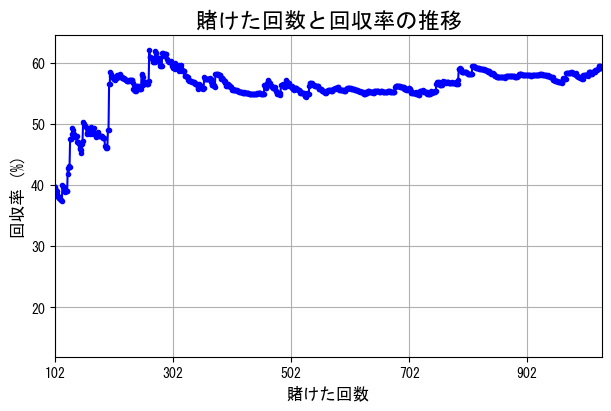

総払い戻し金額: 2668910.0円
賭けた回数: 1028回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,1430.0,9000,9000,1430.0,0.158889
1,202301010106,0.0,200,9200,1430.0,0.155435
2,202301010110,0.0,600,9800,1430.0,0.145918
3,202301010111,0.0,200,10000,1430.0,0.143000
4,202301010205,2220.0,3000,13000,3650.0,0.280769
...,...,...,...,...,...,...
1023,202310030705,0.0,200,4488000,2665990.0,0.594026
1024,202310030711,0.0,200,4488200,2665990.0,0.594000
1025,202310030805,2920.0,21000,4509200,2668910.0,0.591881
1026,202310030806,0.0,600,4509800,2668910.0,0.591802


In [18]:
lgb.plot_returns_rate(df_23)

## XGBmodel

In [19]:
%autoreload

In [20]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='umatan', threshold=0.5, stochastic_variation=False)
pred_df = xgb.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[7878   89]
 [1280   87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      7967
           1       0.49      0.06      0.11      1367

    accuracy                           0.85      9334
   macro avg       0.68      0.53      0.52      9334
weighted avg       0.81      0.85      0.80      9334

Accuracy: 0.8533319048639383
Feature Importance:
                      feature  importance
8                     around    0.129785
30         ground_state_mode    0.097144
10                   weather    0.096885
36    race_interval_category    0.084835
14                 rank_mean    0.060828
11              ground_state    0.056619
29            race_type_mode    0.050576
2                        sex    0.050225
7                  race_type    0.035341
13                     place    0.031965
4                     impost    0.027541
0                      frame    0.027028
16                  

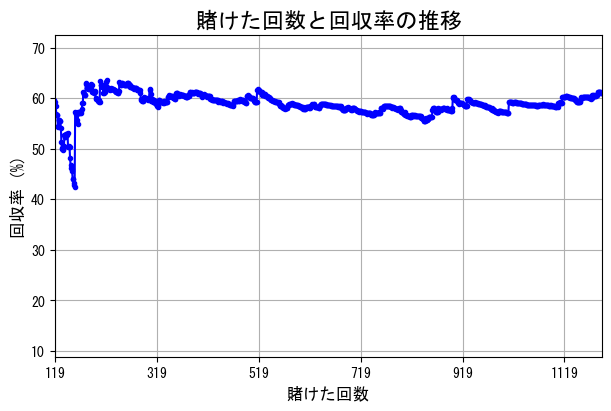

総払い戻し金額: 2474050.0円
賭けた回数: 1192回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,1430.0,7200,7200,1430.0,0.198611
1,202301010106,0.0,200,7400,1430.0,0.193243
2,202301010109,0.0,200,7600,1430.0,0.188158
3,202301010110,0.0,1200,8800,1430.0,0.162500
4,202301010111,1780.0,1200,10000,3210.0,0.321000
...,...,...,...,...,...,...
1187,202310030804,0.0,200,4029800,2467750.0,0.612375
1188,202310030805,2920.0,11000,4040800,2470670.0,0.611431
1189,202310030806,0.0,3000,4043800,2470670.0,0.610977
1190,202310030809,0.0,600,4044400,2470670.0,0.610887


In [21]:
xgb.plot_returns_rate(df_23)

## Ensamblemodel

In [34]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [58]:
%autoreload

In [61]:
en = predict.EnsembleModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.7, stochastic_variation=False)
pred_df = en.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)


 training... 


Confusion Matrix:
 [[4585   94]
 [1201   94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      4679
           1       0.50      0.07      0.13      1295

    accuracy                           0.78      5974
   macro avg       0.65      0.53      0.50      5974
weighted avg       0.73      0.78      0.71      5974

Accuracy: 0.7832273183796451
Feature Importance:
                      feature  importance
8                     around    0.048012
10                   weather    0.047630
34  same_course_len_avg_rank    0.038985
14                 rank_mean    0.038485
23                prize_mean    0.033002
24                 prize_sum    0.032773
13                     place    0.031354
16                  rank_max    0.031059
11              ground_state    0.029698
29            race_type_mode    0.027905
36    race_interval_category    0.027054
44          horse_id_encoded    0.026255
43 

predictions from base model 0 added to meta_data.
predictions from base model 1 added to meta_data.
predictions from base model 2 added to meta_data.
predictions from base model 3 added to meta_data.


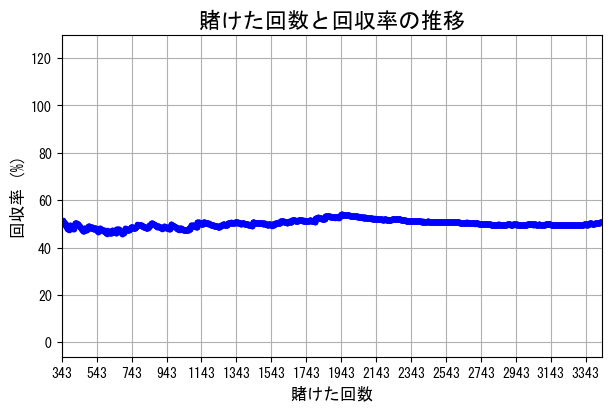

総払い戻し金額: 53948990.0円
賭けた回数: 3434回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010101,0.0,3500,3500,0.0,0.000000
1,202301010102,0.0,8400,11900,0.0,0.000000
2,202301010103,1930.0,36400,48300,1930.0,0.039959
3,202301010104,7060.0,28600,76900,8990.0,0.116905
4,202301010105,1040.0,12000,88900,10030.0,0.112823
...,...,...,...,...,...,...
3429,202310030803,0.0,5600,106090200,53943130.0,0.508465
3430,202310030805,2860.0,56000,106146200,53945990.0,0.508223
3431,202310030806,0.0,100,106146300,53945990.0,0.508223
3432,202310030809,0.0,100,106146400,53945990.0,0.508223


In [62]:
en.plot_returns_rate(df_23)